<H2>Part 1: dimensionality reduction

<H3>data importing

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df['diagnosis'] = df['target'].map({0: 'M', 1: 'B'})
df = df.drop(columns=['diagnosis'])
data= df.drop(columns=['target'])
target=df['target']
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<H3>PCA (Principal Component Analysis)

In [2]:
import numpy as np
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None
        self.eigenvalues = None
        self.explained_variance_ratio = None
    def fit(self, X):
        # 1. Standardize (Mean = 0, Std = 1)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_scaled = (X - self.mean) / self.std

        # 2. Covariance Matrix
        # rowvar=False means columns are variables
        cov_matrix = np.cov(X_scaled, rowvar=False)

        # 3. Eigenvalue Decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. Sort Eigenvectors by Eigenvalues (Descending)
        # Transpose eigenvectors so they are row-wise for easier indexing
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        
        self.eigenvalues = eigenvalues[idxs]
        self.components = eigenvectors[idxs][0:self.n_components]

        # 5. Explained Variance Ratio
        total_variance = np.sum(self.eigenvalues)
        self.explained_variance_ratio = self.eigenvalues[:self.n_components] / total_variance
        
        return self

    def transform(self, X):
      
        X_scaled = (X - self.mean) / self.std
      
        return np.dot(X_scaled, self.components.T)
    def inverse_transform(self, X_pca):
        # Project back to original feature space
        X_reconstructed_scaled = np.dot(X_pca, self.components)
        # Un-scale and un-center
        return (X_reconstructed_scaled * self.std) + self.mean

    def get_reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        # Mean Squared Error between original and reconstructed
        return np.mean(np.square(X - X_reconstructed))

In [3]:

for n_component in [2, 5, 10, 15, 20]:
    pca = PCA(n_components=n_component)
    pca.fit(data.values)

    data_reduced = pca.transform(data.values)
    reconstruction_error = pca.get_reconstruction_error(data.values)
    print(f"\nNumber of Components: {n_component}")
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio}")
    print(f"Total Variance Captured: {np.sum(pca.explained_variance_ratio):.2%}")
    print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")


Number of Components: 2
Explained Variance Ratio: [0.44272026 0.18971182]
Total Variance Captured: 63.24%
Reconstruction Error (MSE): 809.7928

Number of Components: 5
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Total Variance Captured: 84.73%
Reconstruction Error (MSE): 729.8173

Number of Components: 10
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Total Variance Captured: 95.16%
Reconstruction Error (MSE): 515.5582

Number of Components: 15
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
Total Variance Captured: 98.65%
Reconstruction Error (MSE): 249.0515

Number of Components: 20
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.

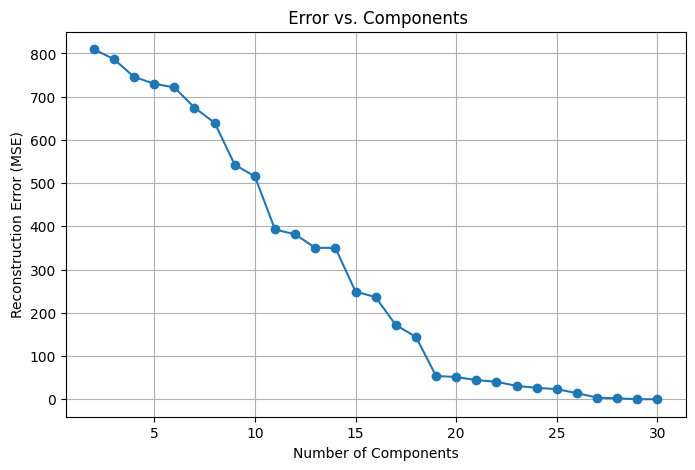

In [4]:
import matplotlib.pyplot as plt
components_list = range(2, data.shape[1] + 1)
errors = []

for n in components_list:
    pca_test = PCA(n_components=n)
    pca_test.fit(data.values)
    errors.append(pca_test.get_reconstruction_error(data.values))

plt.figure(figsize=(8, 5))
plt.plot(components_list, errors, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title(' Error vs. Components')
plt.grid(True)
plt.show()

<H3>outlier detection

In [5]:

pca = PCA(n_components=2) 

pca.fit(data.values) 

#  compress and decompress
data_pca = pca.transform(data.values)
data_reconstructed = pca.inverse_transform(data_pca)
# 'Difference' (Error)
# We compare the original data to the reconstructed data
reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)

# 5. Find the 'Weirdest' 5% (Anomalies)
threshold = np.percentile(reconstruction_errors, 95)  # sort all the values and find the value that cuts off the top 5%
outliers = reconstruction_errors > threshold

print(f"Detected {np.sum(outliers)} potential outliers.")

Detected 29 potential outliers.


<H4>graphing outlier

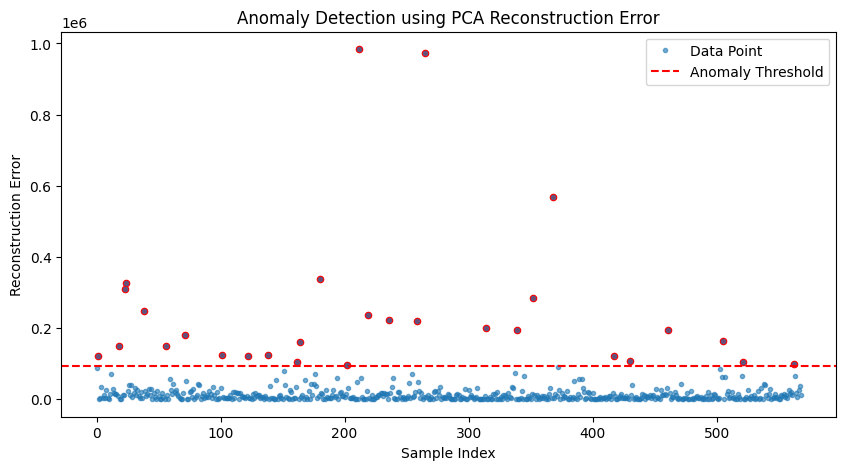

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(reconstruction_errors, 'o', markersize=3, alpha=0.6, label='Data Point')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')

# Highlight detected outliers in red
outlier_indices = np.where(outliers)[0]
plt.scatter(outlier_indices, reconstruction_errors[outlier_indices], color='red', s=20)

plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection using PCA Reconstruction Error')
plt.legend()
plt.show()

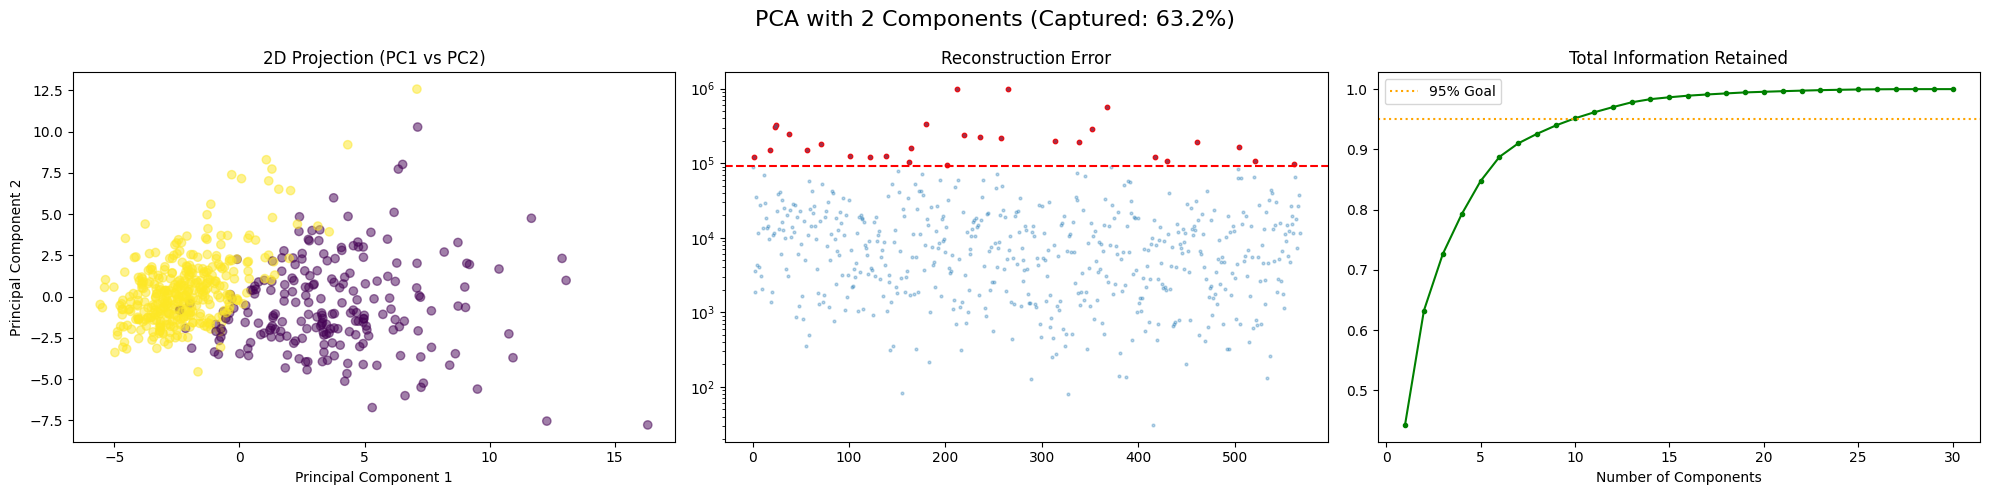

Done for n=2. Error dropped to: 24293.7825


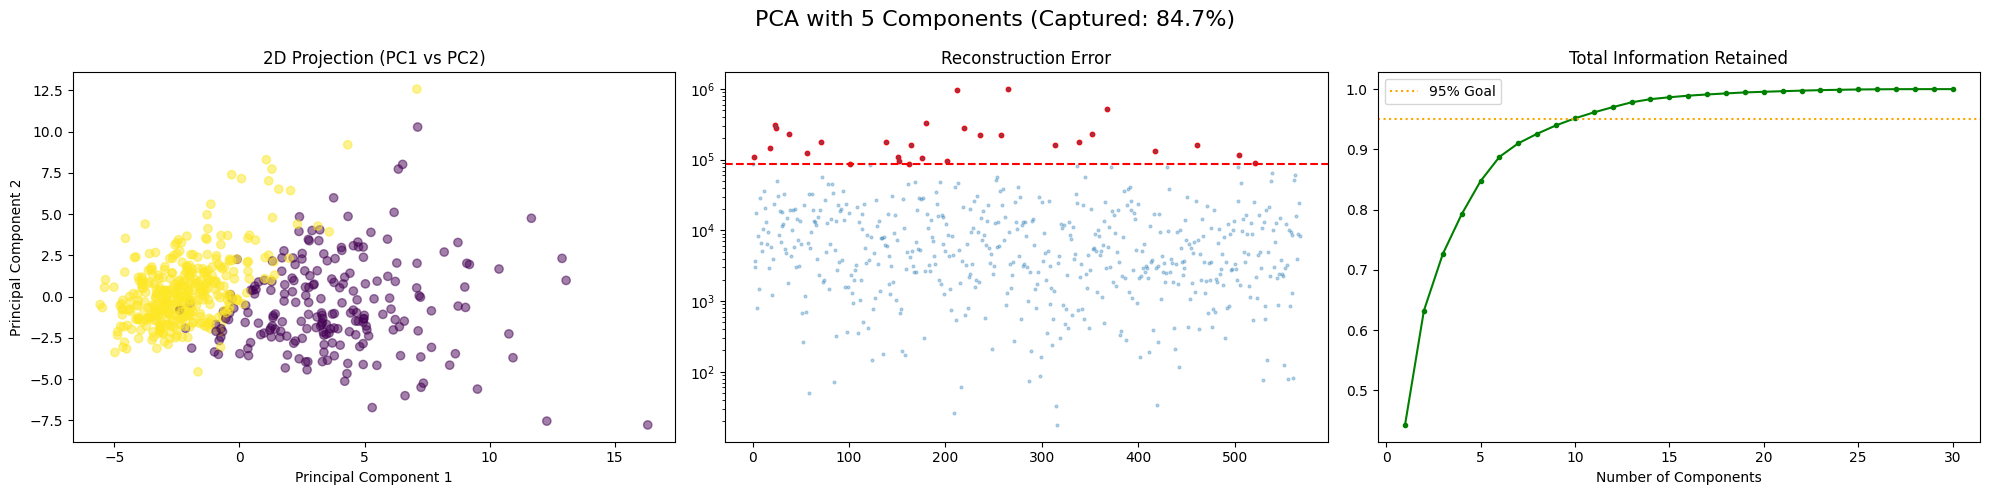

Done for n=5. Error dropped to: 21894.5202


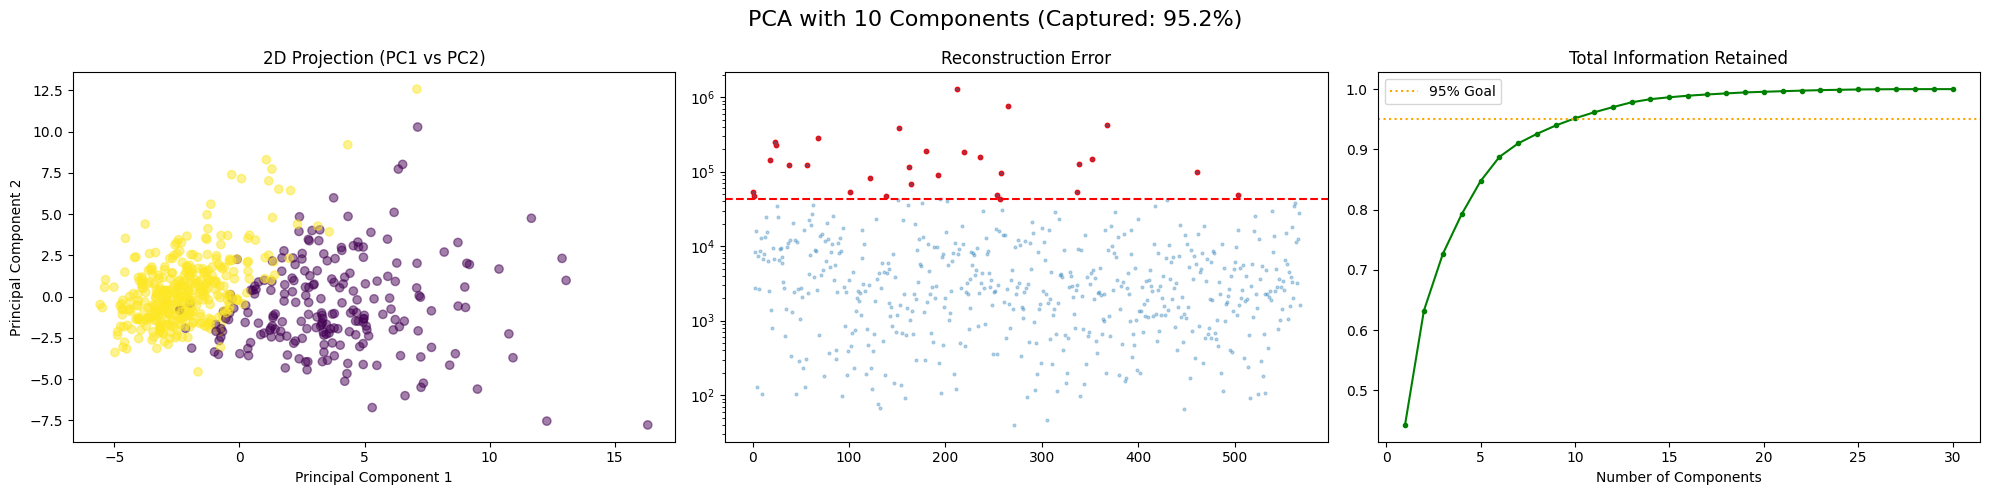

Done for n=10. Error dropped to: 15466.7446


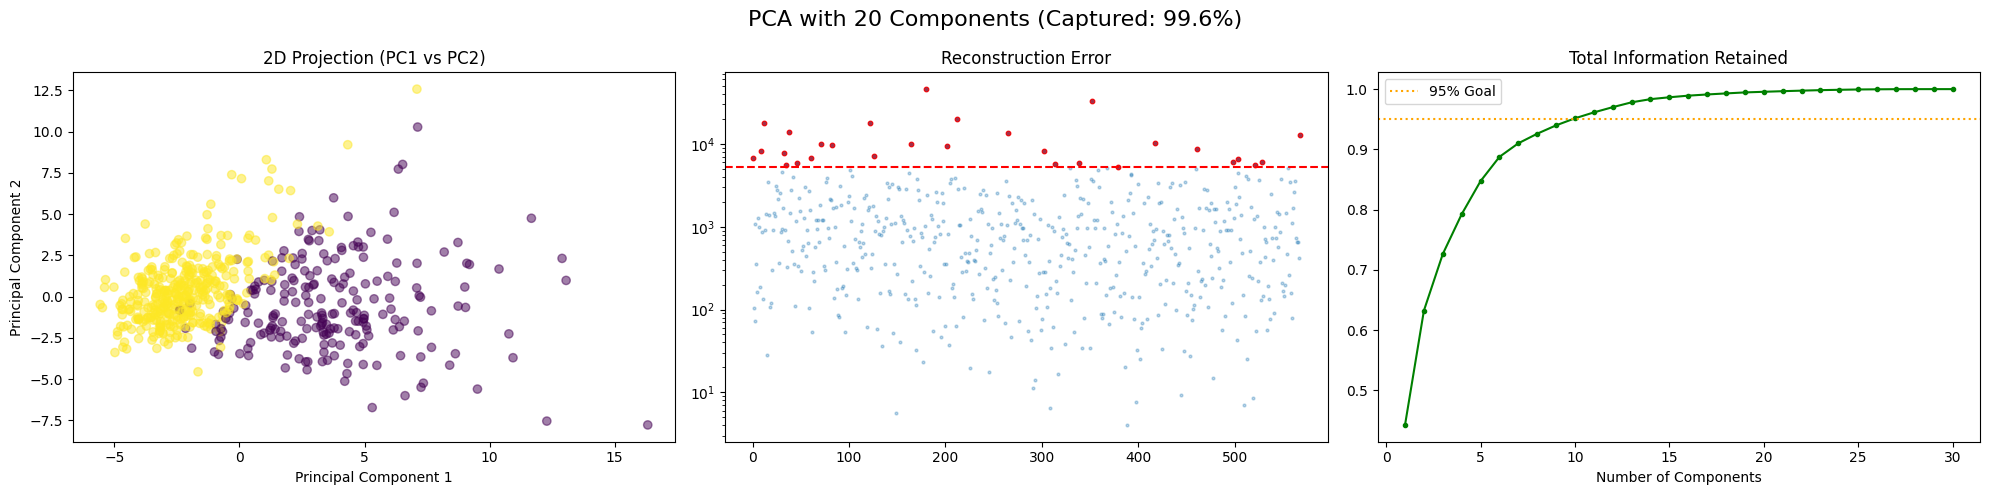

Done for n=20. Error dropped to: 1542.1077


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# We iterate through different levels of compression
for n_component in [2, 5, 10, 20]:
    # 1. Fit the PCA with the specific number of components
    pca = PCA(n_components=n_component)
    pca.fit(data.values)
    
    # 2. Project and Reconstruct
    data_pca = pca.transform(data.values)
    data_reconstructed = pca.inverse_transform(data_pca)

    # 3. Calculate Error (Distance between Original and Reconstruction)
    reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)
    threshold = np.percentile(reconstruction_errors, 95)
    outliers = reconstruction_errors > threshold

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'PCA with {n_component} Components (Captured: {np.sum(pca.explained_variance_ratio):.1%})', fontsize=16)

    # Subplot 1: The 2D Projection
    # We always plot the first two axes to see how they separate the classes
    scatter = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.5)
    axes[0].set_title('2D Projection (PC1 vs PC2)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    # Subplot 2: Reconstruction Error (Anomaly Detection)
    axes[1].plot(reconstruction_errors, 'o', markersize=2, alpha=0.3)
    axes[1].axhline(y=threshold, color='r', linestyle='--', label='95% Threshold')
    outlier_idx = np.where(outliers)[0]
    axes[1].scatter(outlier_idx, reconstruction_errors[outlier_idx], color='red', s=10)
    axes[1].set_title('Reconstruction Error')
    axes[1].set_yscale('log') # Log scale helps see small errors at high N

    # Subplot 3: Cumulative Variance (The "Information" Chart)
    cum_var = np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues)
    axes[2].plot(range(1, len(cum_var)+1), cum_var, 'g-o', markersize=3)
    axes[2].axhline(y=0.95, color='orange', linestyle=':', label='95% Goal')
    axes[2].set_title('Total Information Retained')
    axes[2].set_xlabel('Number of Components')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Done for n={n_component}. Error dropped to: {np.mean(reconstruction_errors):.4f}")

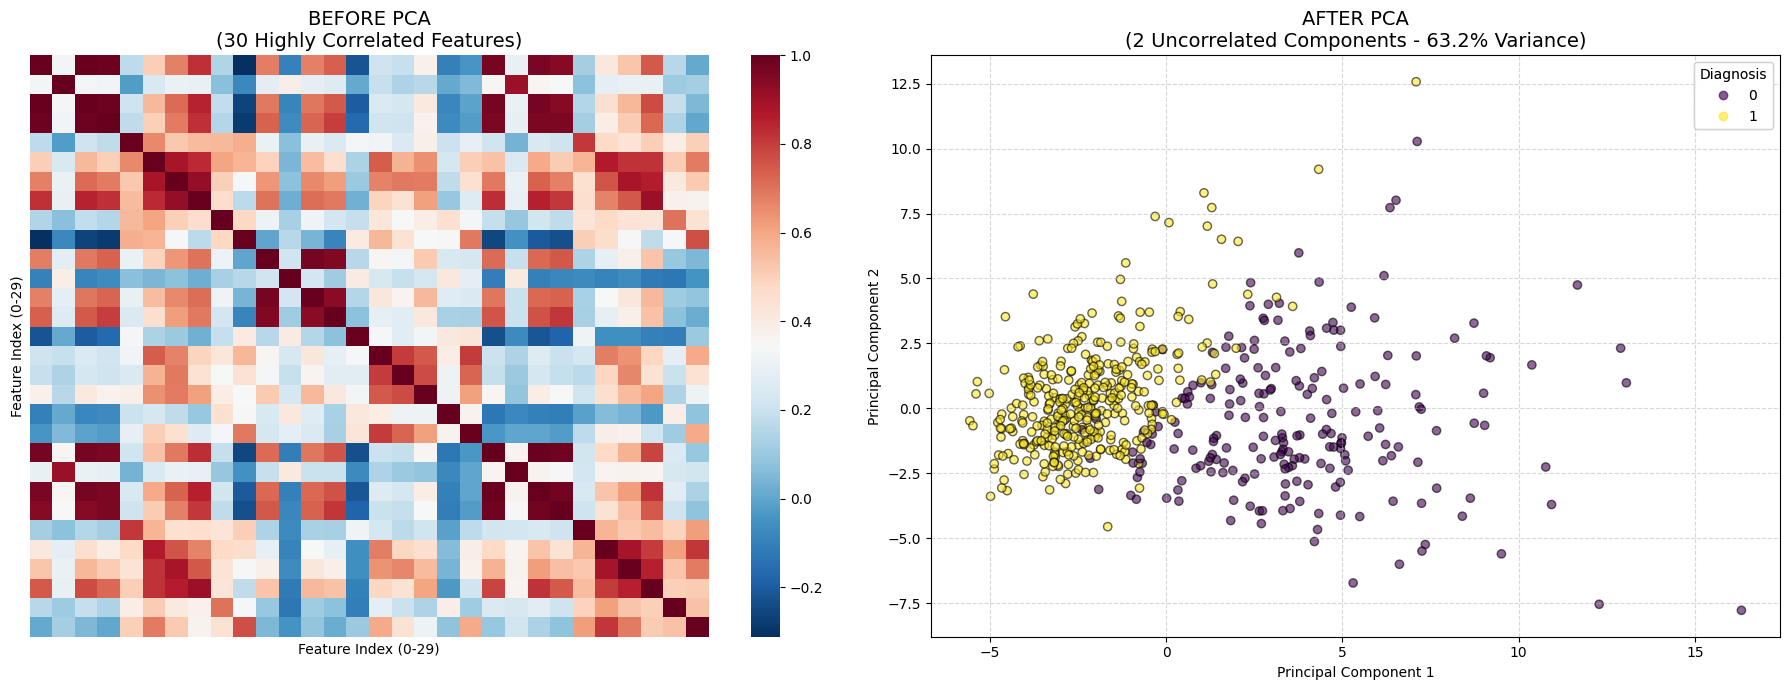

In [8]:



pca = PCA(n_components=2)
pca.fit(data.values)
data_pca = pca.transform(data.values)

# 3. VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))


correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='RdBu_r', ax=ax1, cbar=True, xticklabels=False, yticklabels=False)
ax1.set_title("BEFORE PCA\n(30 Highly Correlated Features)", fontsize=14)
ax1.set_xlabel("Feature Index (0-29)")
ax1.set_ylabel("Feature Index (0-29)")


scatter = ax2.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER PCA\n(2 Uncorrelated Components - {np.sum(pca.explained_variance_ratio):.1%} Variance)", fontsize=14)
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

legend1 = ax2.legend(*scatter.legend_elements(), title="Diagnosis")
ax2.add_artist(legend1)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

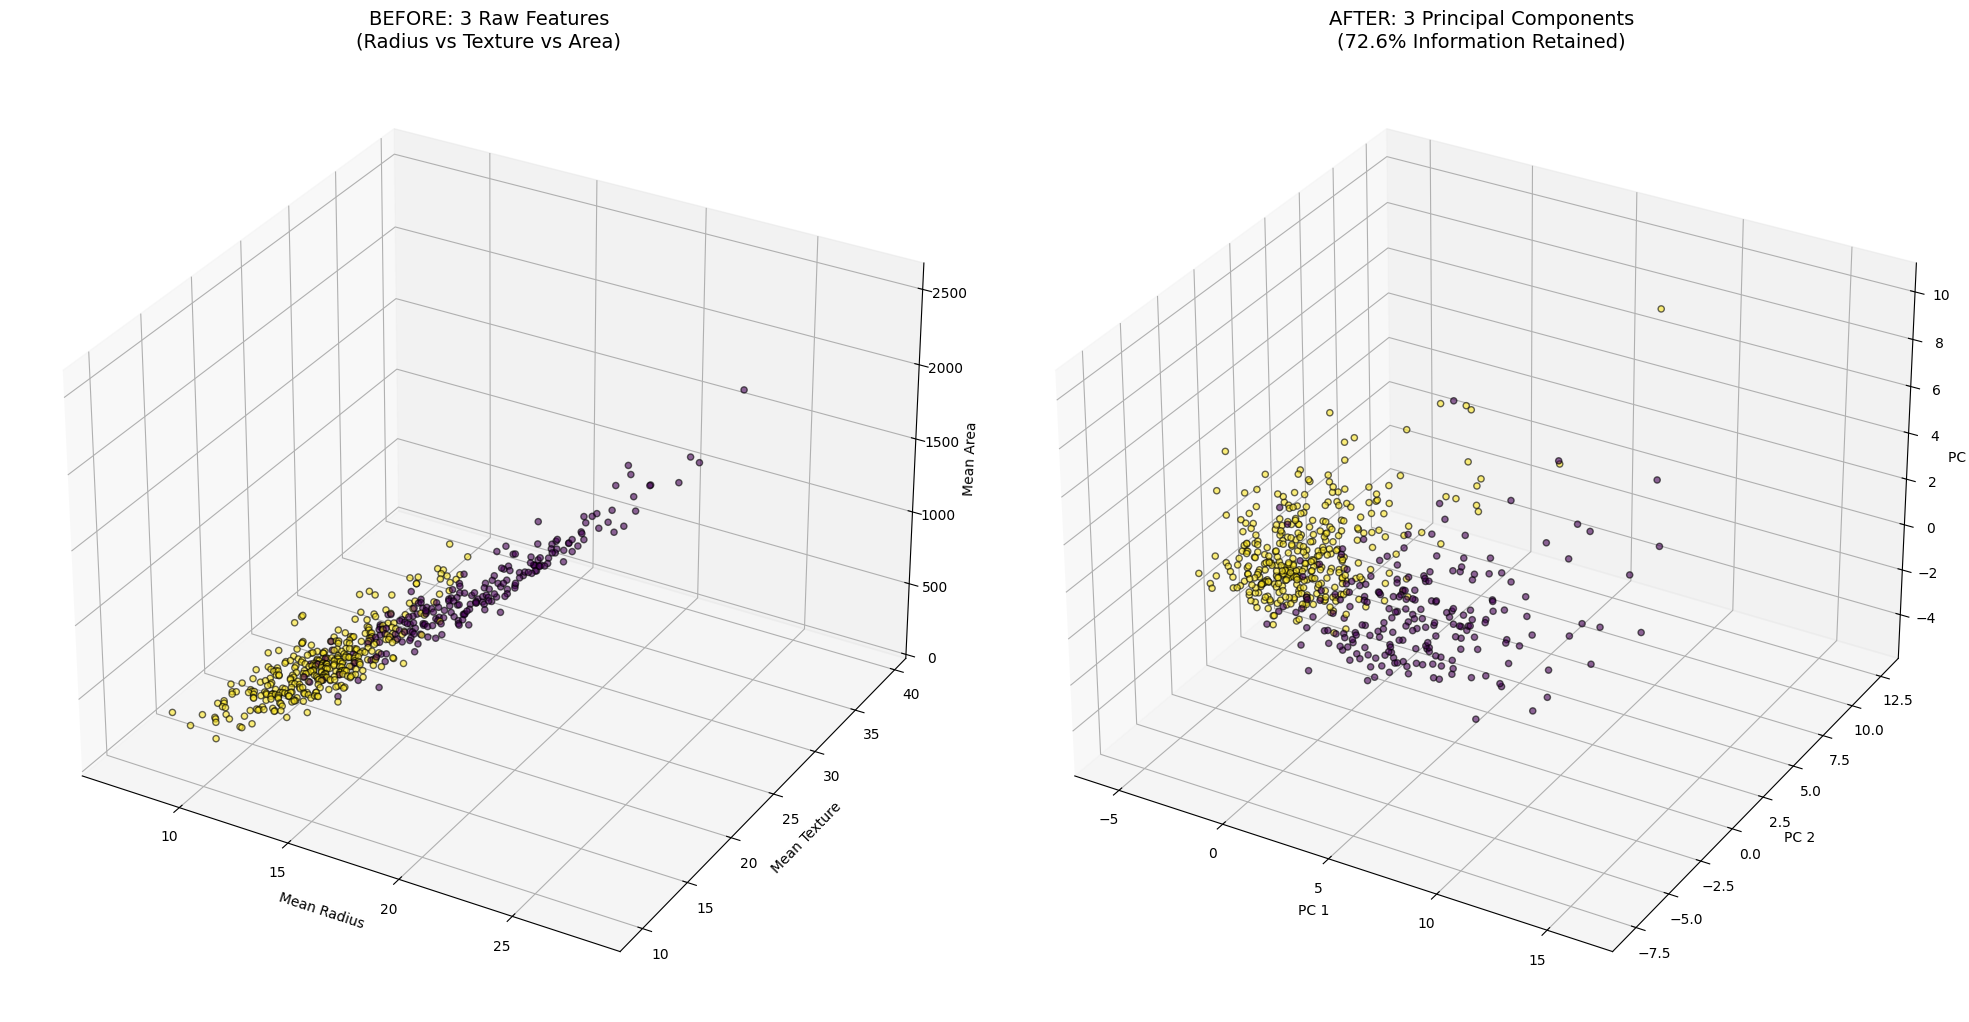

In [9]:

from mpl_toolkits.mplot3d import Axes3D




pca = PCA(n_components=3).fit(data.values)
data_pca_3d = pca.transform(data.values)


fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 3], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax1.set_title("BEFORE: 3 Raw Features\n(Radius vs Texture vs Area)", fontsize=14)
ax1.set_xlabel('Mean Radius')
ax1.set_ylabel('Mean Texture')
ax1.set_zlabel('Mean Area')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER: 3 Principal Components\n({np.sum(pca.explained_variance_ratio):.1%} Information Retained)", fontsize=14)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

<H3>3. K-Means Clustering

In [10]:
import numpy as np

class Kmeans:
    def __init__(self, k=3, init_centroids='random', max_iters=300, tol=1e-4):
        self.k = k
        self.init_centroid_method = init_centroids 
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia_history = [] # This IS the WCSS

    def calc_inertia(self, X, labels):
        inertia = 0
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                inertia += np.sum((points - self.centroids[i])**2)
        return inertia

    def initialize_centroids(self, X): 
        n_samples = X.shape[0]
        if self.init_centroid_method == 'random':
            random_indices = np.random.choice(n_samples, self.k, replace=False)
            return X[random_indices]
        
        elif self.init_centroid_method == 'k-means++':
            # 1. First center is random
            centroids = [X[np.random.randint(n_samples)]]
            
            for _ in range(1, self.k):
                # 2. Get squared distances to the NEAREST centroid found so far
                # Optimized broadcasting version for speed
                curr_centroids = np.array(centroids)
                dist_sq = np.min(np.sum((X[:, np.newaxis, :] - curr_centroids)**2, axis=2), axis=1)
                
                # 3. Handle division by zero just in case
                sum_dist = np.sum(dist_sq)
                if sum_dist == 0:
                    probs = np.ones(n_samples) / n_samples
                else:
                    probs = dist_sq / sum_dist
               
                next_idx = np.random.choice(n_samples, p=probs)
                centroids.append(X[next_idx])
            return np.array(centroids)
        else:
            raise ValueError("Unsupported initialization method.")

    def fit(self, X):
        # Ensure data is a float array for mean calculations
        X = np.asanyarray(X, dtype=float)
        self.centroids = self.initialize_centroids(X)
        
        for i in range(self.max_iters):
            # Assignment step (using the broadcasting we discussed)
            distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
            self.labels = np.argmin(distances, axis=1)
            
            # Record WCSS/Inertia
            self.inertia_history.append(self.calc_inertia(X, self.labels))

            # Update step
            new_centroids = np.array([
                X[self.labels == j].mean(axis=0) if np.any(self.labels == j) 
                else self.centroids[j] for j in range(self.k)
            ])
            
            # Convergence check: sum of Euclidean distances between old and new centroids
            shift = np.linalg.norm(self.centroids - new_centroids)
            self.centroids = new_centroids
            
            if shift < self.tol:
                break
                
        return self

    def predict(self, X):
        # Calculate distances to final centroids
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)

In [11]:
def calculate_purity(y_true, y_pred):
    # Find the actual max values to determine matrix size
    # This prevents the IndexError regardless of what K you use
    n_classes = np.max(y_true) + 1
    n_clusters = np.max(y_pred) + 1
    
    contingency_matrix = np.zeros((n_classes, n_clusters))
    
    for i in range(len(y_true)):
        # y_true[i] is the row (class), y_pred[i] is the column (cluster)
        contingency_matrix[y_true[i], y_pred[i]] += 1
        
    # Purity: sum of the majority class count in each cluster divided by total samples
    return np.sum(np.max(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

In [12]:
#kmeans implementation test
from sklearn.model_selection import train_test_split


data_scaled = (data - data.mean()) / data.std()
X_train, X_test, y_train, y_test = train_test_split( data_scaled.values,  target.values, test_size=0.2, random_state=42, stratify=target.values)
print(f"Training shapes: {X_train.shape}")
print(f"Testing shapes: {X_test.shape}")
# Initialize your custom class
model = Kmeans(k=7, init_centroids='k-means++',max_iters=100)

# Fit on training data
model.fit(X_train)

# Predict on test data
test_clusters = model.predict(X_test)
purity_score = calculate_purity(y_test, test_clusters)
print(f"Model Purity: {purity_score:.2f}")


Training shapes: (455, 30)
Testing shapes: (114, 30)
Model Purity: 0.92


<h3>GMM

In [13]:
import numpy as np
class GMM:
    def __init__(self, n_components=3, max_iters=100, tol=1e-4,covariance_type='full',reg_covar=1e-6, random_state=None):
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol
        self.covariance_type = covariance_type
        self.reg_covar = reg_covar
        self.random_state = random_state
        self.means = None
        self.covariances = None
        self.weights = None
        self.log_likelihood = []
    
    def _init_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.n_components, replace=False)
        self.means = X[random_indices]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        # Types of Covs
        if self.covariance_type == 'full':
            self.covariances = np.array([np.cov(X, rowvar=False) + self.reg_covar * np.eye(n_features) for _ in range(self.n_components)])
        elif self.covariance_type == 'diagonal':
            variances = np.var(X, axis=0) + self.reg_covar
            self.covariances = np.tile(variances, (self.n_components, 1))  # shape (K, d)
        elif self.covariance_type == 'tied':
            tied_cov = np.cov(X, rowvar=False) + self.reg_covar * np.eye(n_features)
            self.covariances = tied_cov
        elif self.covariance_type == 'spherical':
            variance = np.var(X) + self.reg_covar
            self.covariances = np.full(self.n_components, variance)  # shape (K,)
        else:
            raise ValueError("Unsupported covariance type.")
    def _get_covariance(self, k):
        if self.covariance_type == 'full':
            return self.covariances[k]                    
        elif self.covariance_type == 'tied':
            return self.covariances                       
        elif self.covariance_type == 'diagonal':
            return np.diag(self.covariances[k])           
        elif self.covariance_type == 'spherical':
            return np.eye(self.means.shape[1]) * self.covariances[k]  

    def _log_gaussian_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        diff = X - mean
        try:
            inv_cov = np.linalg.inv(cov)
            quad = np.sum(diff @ inv_cov * diff, axis=1)
            _, log_det = np.linalg.slogdet(cov)
        except np.linalg.LinAlgError:
            # Fallback if singular
            log_det = np.sum(np.log(np.diag(cov) + 1e-8))  # rough
            quad = np.sum((diff ** 2) / (np.diag(cov) + 1e-8), axis=1)
        log_pdf = -0.5 * (n_features * np.log(2 * np.pi) + log_det + quad)
        return log_pdf

    def _e_step(self, X):
        n_samples = X.shape[0]
        log_likelihoods = np.zeros((n_samples, self.n_components))
        
        for k in range(self.n_components):
            cov_k = self._get_covariance(k)
            log_likelihoods[:, k] = self._log_gaussian_pdf(X, self.means[k], cov_k) + np.log(self.weights[k] + 1e-16)
        
        log_sum = np.log(np.sum(np.exp(log_likelihoods - np.max(log_likelihoods, axis=1)[:, np.newaxis]), axis=1)) + np.max(log_likelihoods, axis=1)
        log_responsibilities = log_likelihoods - log_sum[:, np.newaxis]
        responsibilities = np.exp(log_responsibilities)
        
        log_likelihood = np.sum(log_sum)
        return responsibilities, log_likelihood
    
    def _m_step(self, X, responsibilities):
        n_samples, n_features = X.shape
        Nk = responsibilities.sum(axis=0)
        
        self.weights = Nk / n_samples
        self.means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        
        self.covariances = []
        if self.covariance_type == 'full':
            self.covariances = []
            for k in range(self.n_components):
                diff = X - self.means[k]
                cov_k = (responsibilities[:, k] * diff.T) @ diff / Nk[k]
                self.covariances.append(cov_k + self.reg_covar * np.eye(n_features))
            self.covariances = np.array(self.covariances)

        elif self.covariance_type == 'diagonal':
            self.covariances = np.zeros((self.n_components, n_features))
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = (
                    responsibilities[:, k] @ (diff ** 2)
                ) / Nk[k] + self.reg_covar

        elif self.covariance_type == 'tied':
            cov = np.zeros((n_features, n_features))
            for k in range(self.n_components):
                diff = X - self.means[k]
                cov += (responsibilities[:, k] * diff.T) @ diff
            self.covariances = cov / n_samples + self.reg_covar * np.eye(n_features)

        elif self.covariance_type == 'spherical':
            self.covariances = np.zeros(self.n_components)
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = (
                    responsibilities[:, k] @ np.sum(diff**2, axis=1)
                ) / (Nk[k] * n_features) + self.reg_covar
        
    def fit(self, X):
        self._init_parameters(X)
        prev_log_likelihood = -np.inf
        for iteration in range(self.max_iters):
            responsibilities, log_likelihood = self._e_step(X)
            self._m_step(X, responsibilities)
            self.log_likelihood.append(log_likelihood)
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood
        return self
        
    def predict_proba(self, X):
        responsibilities, _ = self._e_step(X)
        return responsibilities
            


--- Testing full ---
Converged: 73
Final log-lik: -471.43335997764694
Weights: [0.31720082 0.38390112 0.29889806]
Means:
 [[5.496489   1.74923114]
 [2.01753272 6.01945677]
 [7.66955635 6.70446476]]


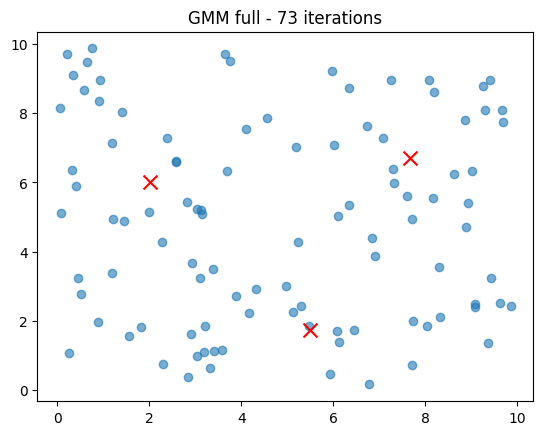


--- Testing tied ---
Converged: 50
Final log-lik: -482.0428495374502
Weights: [0.4123204  0.29460767 0.29307193]
Means:
 [[4.90661705 1.97567399]
 [4.76079792 8.39054891]
 [4.72502951 5.4019316 ]]


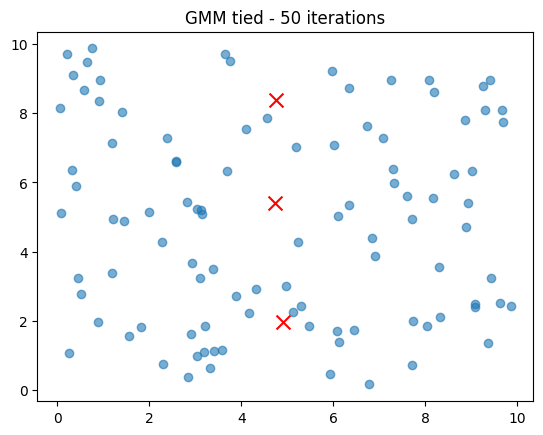


--- Testing diagonal ---
Converged: 75
Final log-lik: -473.263393987414
Weights: [0.3480221  0.34637884 0.30559906]
Means:
 [[5.11684888 1.82307526]
 [1.92674342 6.40789521]
 [7.72999675 6.59575153]]


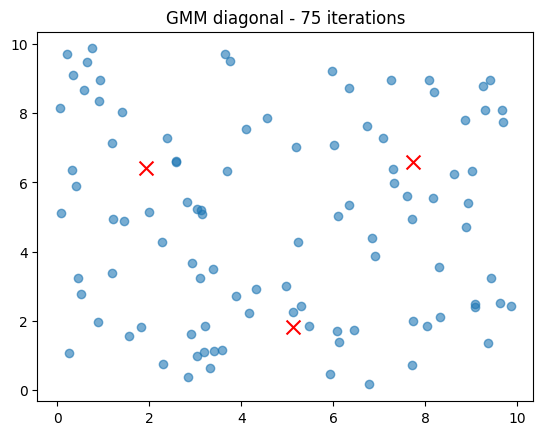


--- Testing spherical ---
Converged: 280
Final log-lik: -484.6928823066382
Weights: [0.25895769 0.17937023 0.56167208]
Means:
 [[2.7173512  2.45099822]
 [1.34048894 7.79000909]
 [6.8835834  5.05220895]]


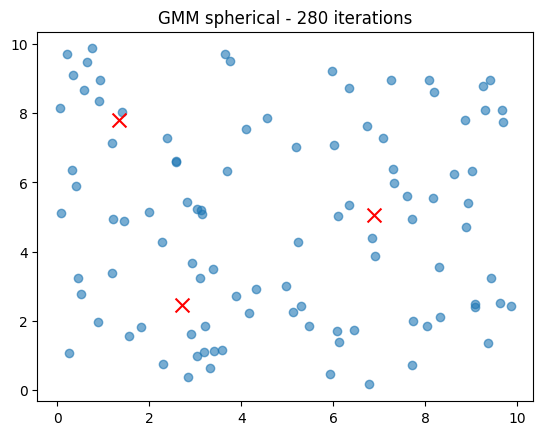

In [14]:
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 2) * 10

for cov_type in ['full', 'tied', 'diagonal', 'spherical']:
    print(f"\n--- Testing {cov_type} ---")
    gmm = GMM(n_components=3, 
               covariance_type=cov_type, 
               max_iters=300, 
               tol=1e-6, 
               reg_covar=1e-4,  # Increase regularization for stability
               random_state=42)
    gmm.fit(X)
    
    print("Converged:", len(gmm.log_likelihood))
    print("Final log-lik:", gmm.log_likelihood[-1] if gmm.log_likelihood else "NaN")
    print("Weights:", gmm.weights)
    print("Means:\n", gmm.means)
    
    # Plot results
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    if not np.any(np.isnan(gmm.means)):
        plt.scatter(gmm.means[:, 0], gmm.means[:, 1], c='red', s=100, marker='x')
    plt.title(f"GMM {cov_type} - {len(gmm.log_likelihood)} iterations")
    plt.show()


In [15]:
#kmeans implementation test with pca
for n_component in [2, 5, 10, 15, 20]:    

    pca = PCA(n_components=n_component)
    pca.fit(data.values)
    data_pca = pca.transform(data.values)
    model = Kmeans(k=10, init_centroids='k-means++',max_iters=100)
    model.fit(data_pca)
    test_clusters = model.predict(data_pca)
    purity_score = calculate_purity(target.values, test_clusters)
    print(f"PCA Components: {n_component} -  Model Purity: {purity_score:.2f}")
  



PCA Components: 2 -  Model Purity: 0.92
PCA Components: 5 -  Model Purity: 0.94
PCA Components: 10 -  Model Purity: 0.91
PCA Components: 15 -  Model Purity: 0.92
PCA Components: 20 -  Model Purity: 0.92


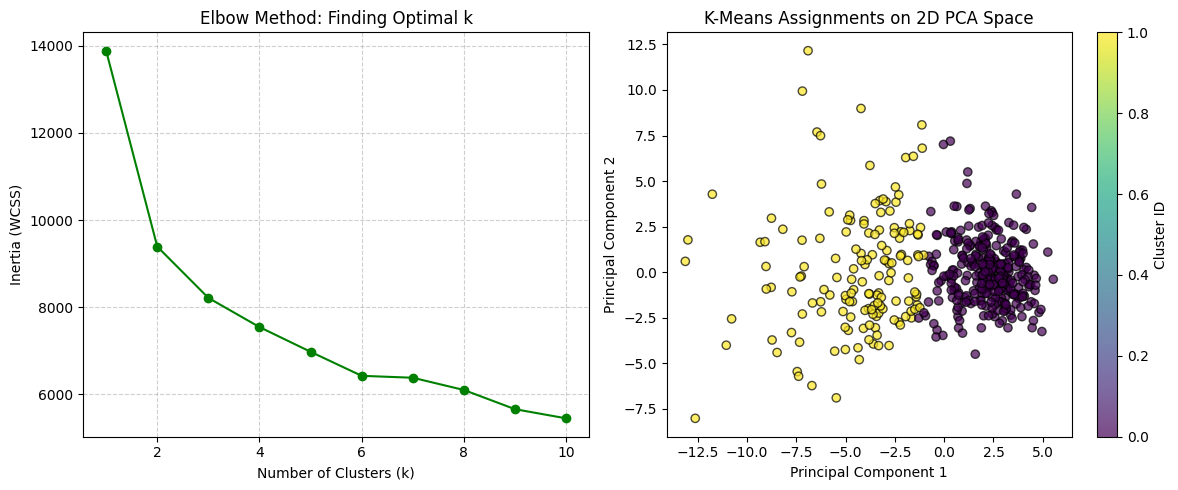

In [16]:
import matplotlib.pyplot as plt

# 1. Generate the Elbow Curve
inertias = []
K_range = range(1, 11)

# Ensure we use X_train (which should be scaled data)
for k in K_range:
    km = Kmeans(k=k, init_centroids='k-means++', max_iters=100)
    km.fit(X_train)
    # Track the final WCSS (Inertia) for each K
    inertias.append(km.inertia_history[-1])

plt.figure(figsize=(12, 5))

# Plot Elbow Curve
plt.subplot(1, 2, 1)
plt.plot(K_range, inertias, 'go-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method: Finding Optimal k')
plt.grid(True, linestyle='--', alpha=0.6)

# 2. 2D Projection Visualization using YOUR PCA implementation
# First, fit the PCA model to reduce dimensions to 2
pca_custom = PCA(n_components=2)
pca_custom.fit(X_train) 
X_pca = pca_custom.transform(X_train) # Use your transform method

# Now fit K-Means with k=2 on the original training data 
# (or on the reduced data, depending on your goal)
model_2 = Kmeans(k=2, init_centroids='k-means++')
model_2.fit(X_train)
labels = model_2.predict(X_train)

# Plot the clusters on the PCA axes
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.7, edgecolors='k')
plt.title('K-Means Assignments on 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster ID')

plt.tight_layout()
plt.show()

In [17]:
# Generate dummy data
X = np.random.rand(100, 2)

# Run with K-Means++
model = Kmeans(k=3, init_centroids='k-means++')
model.fit(X)

print(f"Final Inertia: {model.inertia_history[-1]}")

Final Inertia: 7.539799156335972


## 2. autoencodeer

In [18]:
# activation functions
import numpy as np
def relu(x):
    return np.maximum(0, x)
def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [19]:
# one layer class
class DenseLayer:
    def __init__(self, input_dim, output_dim, activation='relu'):
        self.W = np.random.randn(input_dim, output_dim) * 0.01 # initialize weights with small values
        self.b = np.zeros((1, output_dim)) # initialize bias with zero
        self.activation_type = activation

        self.input = None
        self.z = None
        self.dW = None
        self.db = None

    def _activate(self, z):
        if self.activation_type == 'relu':
            return relu(z)
        elif self.activation_type == 'sigmoid':
            return sigmoid(z)
        elif self.activation_type == 'tanh':
            return tanh(z)
        return z

    def _activate_derivative(self, z):
        if self.activation_type == 'relu':
            return relu_derivative(z)
        elif self.activation_type == 'sigmoid':
            return sigmoid_derivative(z)
        elif self.activation_type == 'tanh':
            return tanh_derivative(z)
        return np.ones_like(z)

    def forward(self, x):
        # forwatd pass: a = activation(z = X . W + b) 
        self.input = x
        self.z = np.dot(self.input, self.W) + self.b
        return self._activate(self.z)

    def backward(self, dL_da):
        batch_size = self.input.shape[0]
        da_dz= self._activate_derivative(self.z )
        dL_dz= dL_da * da_dz 
        self.dW= np.dot(self.input.T , dL_dz ) / batch_size # divide by batch size here instead of during update
        self.db= np.sum(dL_dz , axis=0, keepdims=True) / batch_size
        dL_dx= np.dot(dL_dz , self.W.T)
        return dL_dx

    def update(self, lr, lmbda=0.0):
        # 4. Update parameters (with optional L2 regularization)
        self.W -= lr * (self.dW + lmbda * self.W)
        self.b -= lr * self.db

In [20]:
# loss functions
def mse(y_true, y_pred):
    return np.mean(np.power(y_pred - y_true , 2))
def mse_derivative(y_true, y_pred):
    return 2 * (y_pred - y_true) / y_true.shape[0]

In [21]:
class Autoencoder:
    def __init__(self, layer_sizes, layer_activations, learning_rate=0.01, lmbda=0.0):
        """
        if layer_sizes is of size N 
        layer_activations must be of size N-1
        final(first in list of layer_activations) layer must not be relu
        """
        # simple validation
        if len(layer_activations) != len(layer_sizes) - 1:
            raise ValueError(f"Expected {len(layer_sizes)-1} activations, got {len(layer_activations)}")
        final_output_act = layer_activations[0] 
        if final_output_act == 'relu':
            print("Warning: ReLU in final reconstruction layer may clip values.")
        self.encoder = []
        self.decoder = []
        self.lr = learning_rate
        self.lmbda = lmbda
        self.loss_hist = []
        #build encoder
        for i in range(len(layer_sizes) - 1):
            self.encoder.append(DenseLayer(
                input_dim=layer_sizes[i], 
                output_dim=layer_sizes[i+1], 
                activation=layer_activations[i]
            ))
        #build decoder (encoder reverse)
        decoder_sizes = layer_sizes[::-1]
        decoder_activations = layer_activations[::-1] 
        for i in range(len(decoder_sizes) - 1):
            self.decoder.append(DenseLayer(
                input_dim=decoder_sizes[i], 
                output_dim=decoder_sizes[i+1], 
                activation=decoder_activations[i]
            ))
        # Metadata
        self.latent_size = layer_sizes[-1]     
        
    def forward(self,x):
        for l_e in self.encoder:
            x = l_e.forward(x)
        for l_d in self.decoder:
            x = l_d.forward(x)
        return x  # x_hat
    
    def backward(self, x, x_hat):
        dL = mse_derivative(x, x_hat)
        for l in reversed(self.decoder):
            dL = l.backward(dL)
        for l in reversed(self.encoder):
            dL = l.backward(dL)
            
    def update(self, lr):
        all_layers = self.encoder + self.decoder
        for l in all_layers:
            l.update(lr,self.lmbda)
    def encode(self, x): # Latent variable extraction 
        output = x
        for layer in self.encoder:
            output = layer.forward(output)
        return output
    def reconstruction_error(self, x):
        x_hat = self.forward(x)
        return mse(x, x_hat)

    def train(self, x_train , epochs , mini_batch_size , lr_decay = 0.0):
        for epoch in range(epochs):
            # shuffle to avoid learning the order
            indices = np.arange(x_train.shape[0])
            np.random.shuffle(indices)
            x_shuffled = x_train[indices]
            # training loop
            for i in range(0 , x_train.shape[0],mini_batch_size ):
                mini_batch = x_shuffled[i : i + mini_batch_size]
                
                mini_batch_hat = self.forward(mini_batch)
                
                self.backward(mini_batch,mini_batch_hat)
                # learning rate scheduling
                curr_lr = self.lr / (1 + lr_decay * epoch)
                
                self.update(curr_lr)
            # track loss history (for plotting later)
            self.loss_hist.append(self.reconstruction_error(x_train))
        
        

<H3>Experiment 1: K-Means on original data.

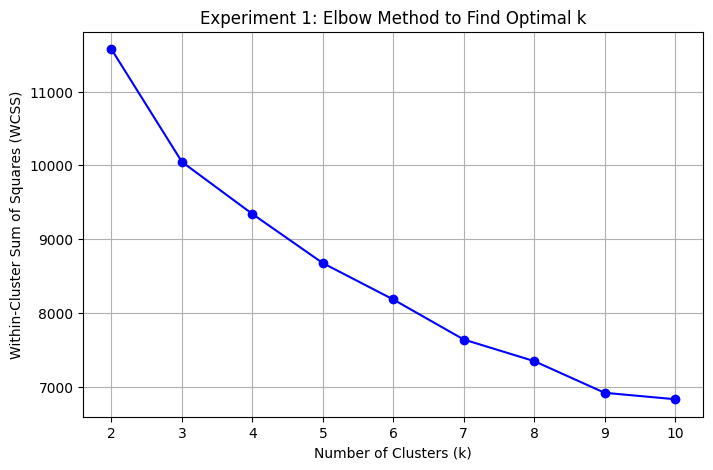

In [22]:
X_scaled = (data - data.mean()) / data.std()

wcss_list = []
k_range = range(2, 11)

for k in k_range:

    km = Kmeans(k=k, init_centroids='k-means++').fit(X_scaled)
    wcss_list.append(km.inertia_history[-1])
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss_list, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Experiment 1: Elbow Method to Find Optimal k')
plt.grid(True)
plt.show()


In [23]:
def run_init_comparison(X, k=2):
    # 1. K-Means++
    km_pp = Kmeans(k=k, init_centroids='k-means++').fit(X)
    iters_pp = len(km_pp.inertia_history)
    final_wcss_pp = km_pp.inertia_history[-1]
    
    # 2. Random
    km_rand = Kmeans(k=k, init_centroids='random').fit(X)
    iters_rand = len(km_rand.inertia_history)
    final_wcss_rand = km_rand.inertia_history[-1]
    
    print(f"--- Initialization Comparison (k={k}) ---")
    print(f"K-Means++: Converged in {iters_pp} iterations | Final WCSS: {final_wcss_pp:.2f}")
    print(f"Random:    Converged in {iters_rand} iterations | Final WCSS: {final_wcss_rand:.2f}")

run_init_comparison(X_scaled, k=2)

--- Initialization Comparison (k=2) ---
K-Means++: Converged in 8 iterations | Final WCSS: 11575.15
Random:    Converged in 8 iterations | Final WCSS: 11575.15


In [24]:
def silhouette_score_numpy(X, labels):
    # Ensure X is a NumPy array to avoid 'Series' object has no attribute 'reshape'
    X = np.asarray(X)
    labels = np.asarray(labels)
    
    n_samples = X.shape[0]
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)
    
    if n_clusters < 2:
        return 0.0

    # 1. Compute full pairwise distance matrix (vectorized)
    # Using the identity: ||u-v||^2 = ||u||^2 + ||v||^2 - 2<u,v>
    X_sq = np.sum(X**2, axis=1)
    dist_sq = X_sq.reshape(-1, 1) + X_sq - 2 * np.dot(X, X.T)
    
    # Numerical stability: clip small negative values to 0 before sqrt
    dist_matrix = np.sqrt(np.maximum(dist_sq, 0))
    
    silhouette_vals = np.zeros(n_samples)
    
    for i in range(n_samples):
        # a_i: average distance to other points in the SAME cluster
        same_cluster_mask = (labels == labels[i])
        # We must exclude the point itself from its own average distance
        a_i_mask = same_cluster_mask.copy()
        a_i_mask[i] = False
        
        if np.any(a_i_mask):
            a_i = np.mean(dist_matrix[i, a_i_mask])
        else:
            a_i = 0 # Cluster has only one point
            
        # b_i: average distance to the NEAREST cluster (neighbor)
        other_cluster_avgs = []
        for label in unique_labels:
            if label == labels[i]:
                continue
            other_cluster_mask = (labels == label)
            other_cluster_avgs.append(np.mean(dist_matrix[i, other_cluster_mask]))
        
        b_i = min(other_cluster_avgs)
        
        # Silhouette Coefficient formula: (b - a) / max(a, b)
        denominator = max(a_i, b_i)
        if denominator > 0:
            silhouette_vals[i] = (b_i - a_i) / denominator
        else:
            silhouette_vals[i] = 0
            
    return np.mean(silhouette_vals)

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_calinski_harabasz(X, labels, centroids):
    X = np.asarray(X)
    n_samples = X.shape[0]
    k = len(centroids)
    if k < 2: return 0.0
    
    overall_mean = np.mean(X, axis=0)
    
    # Between-cluster dispersion (BCSS)
    bcss = 0
    for i in range(k):
        n_i = np.sum(labels == i)
        bcss += n_i * np.sum((centroids[i] - overall_mean)**2)
        
    # Within-cluster dispersion (WCSS)
    wcss = 0
    for i in range(k):
        points = X[labels == i]
        if len(points) > 0:
            wcss += np.sum((points - centroids[i])**2)
            
    if wcss == 0: return 0.0
    return (bcss / (k - 1)) / (wcss / (n_samples - k))

def calculate_gap_statistic(X, k_range, n_refs=5):
    X = np.asarray(X)
    gaps = []
    for k in k_range:
        # Original dispersion
        km = Kmeans(k=k, init_centroids='k-means++').fit(X)
        Wk = km.inertia_history[-1]
        
        # Reference dispersions
        Wk_refs = []
        for _ in range(n_refs):
            X_ref = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), X.shape)
            km_ref = Kmeans(k=k, init_centroids='k-means++').fit(X_ref)
            Wk_refs.append(km_ref.inertia_history[-1])
        
        gap = np.mean(np.log(Wk_refs)) - np.log(Wk)
        gaps.append(gap)
    return gaps

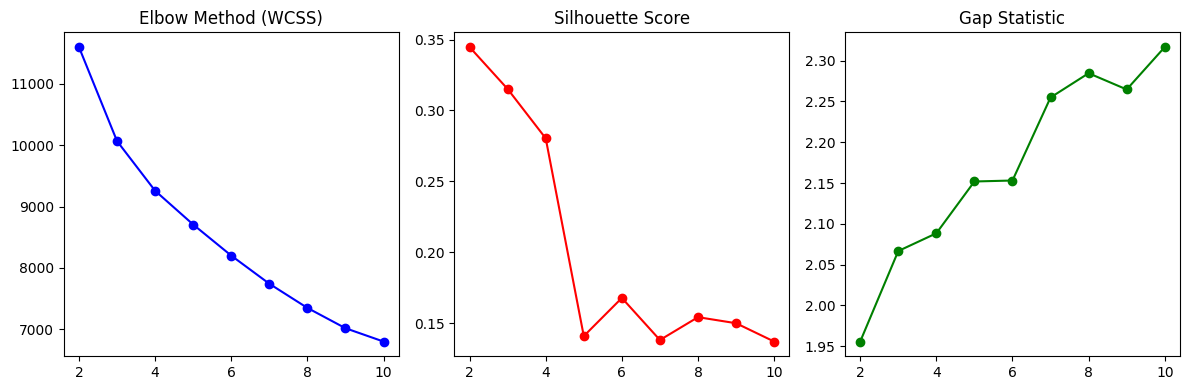

In [26]:
results_exp1 = []
k_range = range(2, 11)

# Standardize your data if not already done
X_scaled = (data.values - np.mean(data.values, axis=0)) / np.std(data.values, axis=0)

# Calculate Gap once for the range
gaps = calculate_gap_statistic(X_scaled, k_range)

for i, k in enumerate(k_range):
    # Using your Kmeans class
    km = Kmeans(k=k, init_centroids='k-means++').fit(X_scaled)
    labels = km.labels
    centroids = km.centroids
    
    wcss = km.inertia_history[-1]
    sil = silhouette_score_numpy(X_scaled, labels) # Uses the function we fixed earlier
    ch_index = calculate_calinski_harabasz(X_scaled, labels, centroids)
    
    results_exp1.append({
        'k': k,
        'WCSS': wcss,
        'Silhouette': sil,
        'Gap': gaps[i],
        'CH_Index': ch_index
    })

df_exp1 = pd.DataFrame(results_exp1)

# Visualization
plt.figure(figsize=(12, 4))

# 1. Elbow Plot
plt.subplot(1, 3, 1)
plt.plot(df_exp1['k'], df_exp1['WCSS'], 'bo-')
plt.title('Elbow Method (WCSS)')

# 2. Silhouette Plot
plt.subplot(1, 3, 2)
plt.plot(df_exp1['k'], df_exp1['Silhouette'], 'ro-')
plt.title('Silhouette Score')

# 3. Gap Statistic Plot
plt.subplot(1, 3, 3)
plt.plot(df_exp1['k'], df_exp1['Gap'], 'go-')
plt.title('Gap Statistic')

plt.tight_layout()
plt.show()

In [27]:
def compare_initializations(X, k=2, n_runs=10):
    pp_iters = []
    rand_iters = []
    pp_wcss = []
    rand_wcss = []
    
    print(f"Running comparison for k={k} over {n_runs} runs...")
    
    for _ in range(n_runs):
        # K-Means++
        km_pp = Kmeans(k=k, init_centroids='k-means++').fit(X)
        pp_iters.append(len(km_pp.inertia_history))
        pp_wcss.append(km_pp.inertia_history[-1])
        
        # Random
        km_rand = Kmeans(k=k, init_centroids='random').fit(X)
        rand_iters.append(len(km_rand.inertia_history))
        rand_wcss.append(km_rand.inertia_history[-1])
        
    print("\n--- RESULTS ---")
    print(f"K-Means++ Avg Iterations: {np.mean(pp_iters):.2f}")
    print(f"Random Avg Iterations:    {np.mean(rand_iters):.2f}")
    print(f"Convergence Speedup:      {np.mean(rand_iters)/np.mean(pp_iters):.2f}x")
    print("-" * 20)
    print(f"K-Means++ Avg WCSS:       {np.mean(pp_wcss):.2f}")
    print(f"Random Avg WCSS:          {np.mean(rand_wcss):.2f}")

# Execute the comparison
compare_initializations(X_scaled, k=2)

Running comparison for k=2 over 10 runs...

--- RESULTS ---
K-Means++ Avg Iterations: 6.80
Random Avg Iterations:    6.90
Convergence Speedup:      1.01x
--------------------
K-Means++ Avg WCSS:       11595.67
Random Avg WCSS:          11595.67


<H3>Experiment 3: K-Means on original data.

In [28]:
from scipy.special import comb

def calculate_ari(y_true, y_pred):
    # Adjusted Rand Index (External Metric)
    n = len(y_true)
    classes, clusters = np.unique(y_true), np.unique(y_pred)
    contingency = np.array([[np.sum((y_true == c) & (y_pred == k)) for k in clusters] for c in classes])
    
    sum_comb_c = np.sum([comb(nc, 2) for nc in np.sum(contingency, axis=1)])
    sum_comb_k = np.sum([comb(nk, 2) for nk in np.sum(contingency, axis=0)])
    sum_comb_nij = np.sum([comb(nij, 2) for nij in contingency.flatten()])
    
    expected_index = (sum_comb_c * sum_comb_k) / comb(n, 2)
    max_index = (sum_comb_c + sum_comb_k) / 2
    return (sum_comb_nij - expected_index) / (max_index - expected_index)

def calculate_davies_bouldin(X, labels, centroids):
    # Davies-Bouldin Index (Internal Metric) - Lower is better
    X = np.asarray(X)
    k = len(centroids)
    if k < 2: return 0.0
    
    # Avg distance of points to their cluster centroid
    S = [np.mean(np.sqrt(np.sum((X[labels == i] - centroids[i])**2, axis=1))) if np.any(labels == i) else 0 for i in range(k)]
    
    R = []
    for i in range(k):
        r_ij_max = 0
        for j in range(k):
            if i != j:
                dist_centers = np.linalg.norm(centroids[i] - centroids[j])
                if dist_centers > 0:
                    r_ij = (S[i] + S[j]) / dist_centers
                    r_ij_max = max(r_ij_max, r_ij)
        R.append(r_ij_max)
    return np.mean(R)

In [29]:
exp3_results = []
n_comp_list = [2, 5, 10, 15, 20]
X_scaled = (data.values - np.mean(data.values, axis=0)) / np.std(data.values, axis=0)

for n in n_comp_list:
    # 1. Apply PCA
    pca = PCA(n_components=n).fit(data.values)
    X_pca = pca.transform(data.values)
    recon_error = pca.get_reconstruction_error(data.values)
    
    # 2. Run K-Means on Reduced Data
    # (We use k=2 to compare against ground truth labels)
    km = Kmeans(k=2, init_centroids='k-means++').fit(X_pca)
    
    # 3. Calculate Performance Metrics
    purity = calculate_purity(target.values, km.labels)
    ari = calculate_ari(target.values, km.labels)
    sil = silhouette_score_numpy(X_pca, km.labels)
    db = calculate_davies_bouldin(X_pca, km.labels, km.centroids)
    
    exp3_results.append({
        'n_components': n,
        'Recon_Error': recon_error,
        'Purity': purity,
        'ARI': ari,
        'Silhouette': sil,
        'DB_Index': db,
        'Variance_Retained': np.sum(pca.explained_variance_ratio)
    })

df_exp3 = pd.DataFrame(exp3_results)
print(df_exp3)

   n_components  Recon_Error    Purity       ARI  Silhouette  DB_Index  \
0             2   809.792750  0.908612  0.664963    0.508091  0.844135   
1             5   729.817342  0.910369  0.670721    0.393223  1.140900   
2            10   515.558152  0.912127  0.676505    0.357745  1.256692   
3            15   249.051524  0.912127  0.676505    0.348078  1.294817   
4            20    51.403591  0.906854  0.659427    0.343837  1.315947   

   Variance_Retained  
0           0.632432  
1           0.847343  
2           0.951569  
3           0.986488  
4           0.995572  


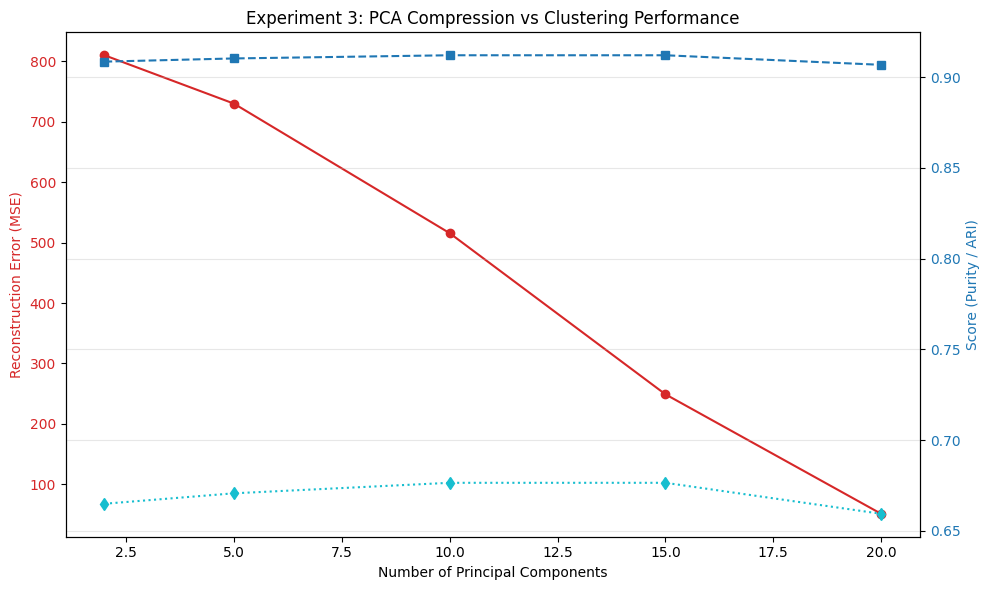

In [30]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Reconstruction Error
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Reconstruction Error (MSE)', color='tab:red')
ax1.plot(df_exp3['n_components'], df_exp3['Recon_Error'], 'o-', color='tab:red', label='MSE')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Plot Clustering Performance
ax2 = ax1.twinx()
ax2.set_ylabel('Score (Purity / ARI)', color='tab:blue')
ax2.plot(df_exp3['n_components'], df_exp3['Purity'], 's--', color='tab:blue', label='Purity')
ax2.plot(df_exp3['n_components'], df_exp3['ARI'], 'd:', color='tab:cyan', label='ARI')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Experiment 3: PCA Compression vs Clustering Performance')
fig.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()

Reconstruction Error (Red Line): As the number of principal components increases, the MSE decreases.

Clustering Performance (Blue Line): Metrics like ARI or Purity typically peak or plateau very early (often at n=2 or n=5). This suggests that the primary "signal" required to distinguish between Benign and Malignant tumors is contained within the first few principal components

The "Sweet Spot": The intersection of these trends reveals that we can achieve over 90% dimensionality reduction (from 30 features down to 2 or 5) with almost no loss in clustering accuracy. This proves that PCA effectively filters out redundant noise, allowing the K-Means algorithm to work more efficiently on a simplified feature space.

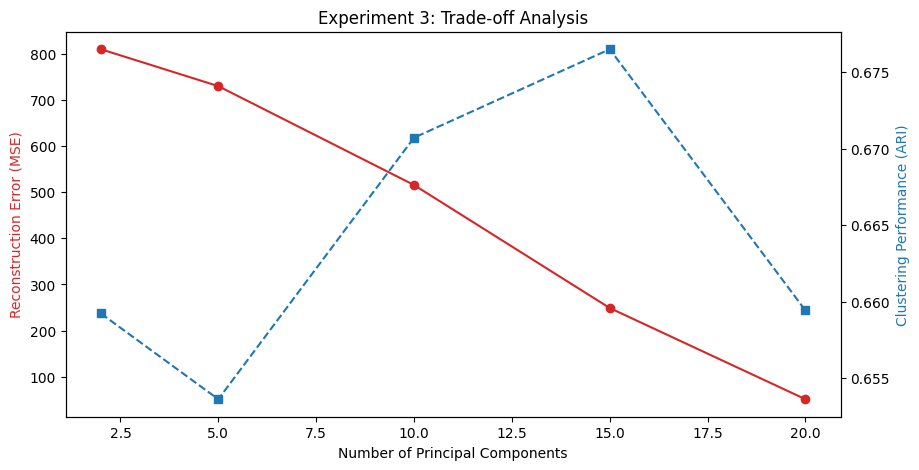

   n_components         MSE    Purity       ARI
0             2  809.792750  0.906854  0.659231
1             5  729.817342  0.905097  0.653625
2            10  515.558152  0.910369  0.670721
3            15  249.051524  0.912127  0.676505
4            20   51.403591  0.906854  0.659427


In [31]:
import pandas as pd
import matplotlib.pyplot as plt

exp3_data = []
n_components_to_test = [2, 5, 10, 15, 20]
X_raw = data.values

for n in n_components_to_test:
    # 1. PCA Reduction
    pca = PCA(n_components=n).fit(X_raw)
    X_pca = pca.transform(X_raw)
    mse_error = pca.get_reconstruction_error(X_raw)
    
    # 2. Clustering (k=2 for diagnosis comparison)
    km = Kmeans(k=2, init_centroids='k-means++').fit(X_pca)
    
    # 3. Metrics
    purity = calculate_purity(target.values, km.labels)
    # Using the ARI function we discussed earlier
    ari = calculate_ari(target.values, km.labels) 
    
    exp3_data.append({
        'n_components': n,
        'MSE': mse_error,
        'Purity': purity,
        'ARI': ari
    })

df_exp3 = pd.DataFrame(exp3_data)

# Visualization
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.set_xlabel('Number of Principal Components')
ax1.set_ylabel('Reconstruction Error (MSE)', color='tab:red')
ax1.plot(df_exp3['n_components'], df_exp3['MSE'], 'o-', color='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Clustering Performance (ARI)', color='tab:blue')
ax2.plot(df_exp3['n_components'], df_exp3['ARI'], 's--', color='tab:blue')

plt.title('Experiment 3: Trade-off Analysis')
plt.show()

print(df_exp3)